<a href="https://colab.research.google.com/github/Gajalakshmisubramani/quatumMachinelearning-/blob/main/qml_imageclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pennylane

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import matplotlib.pyplot as plt

# 1. Preprocessing for a Single Image
def preprocess_single_image(image_path, output_size=(8, 8)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, output_size)
    flattened_image = img.flatten()  # Flatten to use as a feature vector
    return img, flattened_image

# 2. Display the Original Image
def display_original_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

# 3. Perform EDA (For a Single Image, Show the Image)
def perform_eda_single_image(image_path):
    display_original_image(image_path)

# 4. Feature Extraction for a Single Image
def extract_features_single_image(image_path):
    _, flattened_image = preprocess_single_image(image_path)
    return flattened_image

# Main Program
if __name__ == "__main__":
    # Set the path to your single image
    single_image_path = "/content/drive/MyDrive/New folder1/1-001.png"

    # 1. Preprocess the Single Image
    original_image, flattened_image = preprocess_single_image(single_image_path)

    # 2. Display the Original Image
    display_original_image(single_image_path)

    # 3. Perform EDA (For a Single Image, Show the Image)
    perform_eda_single_image(single_image_path)

    # 4. Feature Extraction for a Single Image
    features = extract_features_single_image(single_image_path)

    print("Flattened Image Feature Vector:")
    print(features)


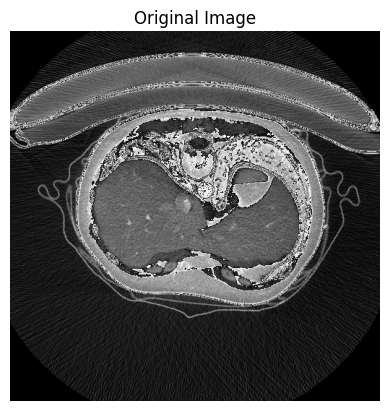

1/1 [==============================] - 0s 75ms/step
Probability of Pancreatic Cancer: [0.17818202 0.52516463 0.22683808 0.06981528 0.17911612 0.44855077
 0.31370035 0.05863276 0.27870924 0.2103979  0.31898628 0.19190658
 0.25916912 0.22674596 0.30854894 0.20553598 0.14840224 0.29250525
 0.44231656 0.11677595 0.13176058 0.5793311  0.13667434 0.15223398
 0.11650991 0.09123604 0.64610791 0.14614614 0.00717601 0.65038842
 0.01859224 0.32384333]
Predicted Class (1 for Pancreatic Cancer, 0 for Not Pancreatic Cancer): 1


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pennylane as qml
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Function to preprocess a single image
def preprocess_image(image_path, output_size=(8, 8)):
    img = Image.open(image_path)
    img = img.resize(output_size)
    img = img.convert('L')  # Convert to grayscale
    return np.array(img)

# Function for data visualization
def visualize_image(image_path):
    img = Image.open(image_path)
    plt.imshow(img, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')
    plt.show()

# Function to create a simple QCNN model for binary classification
def quantum_convolution(params, data):
    qml.templates.AngleEmbedding(data, wires=range(data.shape[0]))
    for i in range(data.shape[0]):
        qml.Hadamard(wires=i)

    for param in params:
        qml.Rot(*param[0], wires=[0])
        qml.Rot(*param[1], wires=[1])
        qml.CNOT(wires=[0, 1])
        qml.Rot(*param[2], wires=[0])
        qml.Rot(*param[3], wires=[1])
        qml.CNOT(wires=[1, 0])

    return qml.probs(wires=[0, 1])

# Function for quantum neural network model for binary classification
def quantum_neural_network(params, image):
    dev = qml.device('default.qubit', wires=image.shape[0])
    @qml.qnode(dev)
    def circuit(params, data):
        return quantum_convolution(params, data)

    return circuit(params, image)

# Main program
if __name__ == "__main__":
    # Set up paths
    image_path = "/content/drive/MyDrive/New folder1/1-054.png"  # Replace with the path to your single PNG photo
    output_size = (8, 8)

    # Preprocess the single image
    image_data = preprocess_image(image_path, output_size)

    # Visualize the original image
    visualize_image(image_path)

    # Set up parameters and hyperparameters for the QCNN
    params = np.random.rand(3, 4, 3)  # Example random parameters

    # Run the quantum neural network
    probability_positive_class = quantum_neural_network(params, image_data)

    # Flatten or reshape the quantum probability array
    flattened_probability = probability_positive_class.flatten()

    # Classical Neural Network (Example: Using TensorFlow/Keras)
    model = Sequential()
    model.add(Dense(8, input_shape=(len(flattened_probability),), activation='relu'))  # Adjust input shape
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Classify based on the flattened probability
    prediction = model.predict(np.array([flattened_probability]))[0, 0]

    # Display the probability and prediction
    print("Probability of Pancreatic Cancer:", flattened_probability)
    print("Predicted Class (1 for Pancreatic Cancer, 0 for Not Pancreatic Cancer):", round(prediction))
